# Project_ADULT, Zachariah Gutierrez

## Dataset information

Name: Adult <br>
Data Type: Multivariate <br>
Default Task: Classification <br>
Attribute Types: categorical, integer <br>
No. Instances: 48842 <br>
No. Attributes: 14 <br>
Year: 1996 <br>
Task: Determine whether a person makes over 50K a year based on census data using SVM, KNN, and Random Forests

## Imports and functions

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=DeprecationWarning)
    from sklearn.ensemble import RandomForestClassifier

In [3]:
# heatmap for LinearSVC
def draw_heatmap_linear(acc, acc_desc, C_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=C_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$C$')
    plt.title(acc_desc + ' w.r.t $C$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

# heatmap for K-NearestNeighbors
def draw_heatmap_knn(acc, acc_desc, k_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=k_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$k$')
    plt.title(acc_desc + ' w.r.t $k$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()
    
# heatmap for RandomForest
def draw_heatmap_rf(acc, acc_desc, p_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=p_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$params$')
    plt.title(acc_desc + ' w.r.t $params$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

## Load and transform the data

In [4]:
# import the data and set the column names
X_and_y = pd.read_csv('adult.data.txt', header=None)
X_and_y.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship',
              'race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

print('Shape of original data is:', X_and_y.shape)

# shuffle the data then split X and y
X_and_y = X_and_y.sample(frac=1).reset_index(drop=True)
X = X_and_y.iloc[:,0:14]
y = X_and_y.iloc[:,-1]

Shape of original data is: (32561, 15)


In [5]:
# inspect the data
X_and_y.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,21,Private,169699,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,35,United-States,<=50K
1,38,Self-emp-not-inc,203836,5th-6th,3,Never-married,Transport-moving,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,28,Private,25955,Assoc-voc,11,Divorced,Craft-repair,Not-in-family,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
3,45,Private,90758,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,United-States,>50K
4,31,Self-emp-not-inc,119411,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,50,United-States,<=50K


In [6]:
# one-hot encode the data (dummy variables)
X = pd.get_dummies(X)
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,21,169699,10,0,0,35,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,203836,3,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,25955,11,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,45,90758,13,0,0,55,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,31,119411,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
y.head()

0     <=50K
1     <=50K
2     <=50K
3      >50K
4     <=50K
Name: income, dtype: object

In [8]:
# Binarize y (maybe not neccessary)
y = y.to_frame().transpose()        

for i in y:
    if y[i][0] == ' <=50K':
        y[i][0] = 1
    elif y[i][0] == ' >50K':
        y[i][0] = 0
        
y = y.transpose()   # wouldn't work without transposing...
y.head()                

,income
0,1
1,1
2,1
3,0
4,1


In [9]:
# converts dataframes to np arrays
X = X.values    
y = y.values

In [10]:
# reshape y and change from object type
y = y.reshape(32561,)   # 32561 is original row count 
y = y.astype('int')     # y was an object, convert to int to avoid error

## Train the models (SVM, KNN, & RandomForest)

In [11]:
final_score_svm = []
final_score_knn = []
final_score_rf = []

### Adult 20/80

In [12]:
%%time

## Train every model on three random splits of 20/80

## Note: The split is non-deterministic. Repeating three times with the
## same split will give you somewhat different subsets. This is why three
## trials are needed to reach a consistent conclusion by taking the average.

print('Training three classifiers using three trials on Adult.data, split=20/80...')
print('(Accuracy scores are listed with respect to their individual hyperparameters.)')

# initialize the accuracy lists
avg_test_acc_svm = np.zeros((1,5))  # 5 for each value of C penalties
avg_test_acc_knn = np.zeros((1,7))  # 7 for each value of K neighbors
avg_test_acc_rf = np.zeros((1,8))   # 8 for each parameter combo in RF

for i in range(3):   # run three trials
    
    print('\nFor trial #', i+1)
    
    # split data into training/testing (20/80)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80)
    
    # train SVM classifier
    C_list = [10e-2, 10e-1, 10e0, 10e1, 10e2]
    param_grid = {'C': C_list}
    clf = LinearSVC()
    SVM = GridSearchCV(clf, param_grid, cv=5, return_train_score = True)
    SVM.fit(X_train, y_train)
    train_acc_svm = SVM.cv_results_['mean_train_score']
    test_acc_svm = SVM.cv_results_['mean_test_score']
    train_acc_svm = np.asarray(train_acc_svm)
    test_acc_svm = np.asarray(test_acc_svm)
    print('The SVM training accuracy is',train_acc_svm)
    print('The SVM testing accuracy is',test_acc_svm)
    avg_test_acc_svm = np.vstack((avg_test_acc_svm, test_acc_svm))
    
    # train KNN classifier
    K_list = list(range(1,8))         
    param_grid = {'n_neighbors': K_list}
    clf = KNeighborsClassifier()
    KNN = GridSearchCV(clf, param_grid, cv=5, return_train_score = True)
    KNN.fit(X_train, y_train)
    train_acc_knn = KNN.cv_results_['mean_train_score']
    test_acc_knn = KNN.cv_results_['mean_test_score']
    train_acc_knn = np.asarray(train_acc_knn)
    test_acc_knn = np.asarray(test_acc_knn)
    print('\nThe KNN training accuracy is',train_acc_knn)
    print('The KNN testing accuracy is',test_acc_knn)
    avg_test_acc_knn = np.vstack((avg_test_acc_knn, test_acc_knn))
    
    # train RandomForest classifier
    param_grid = {'n_estimators': [100], 'max_features': ['auto', 'sqrt'],
                  'max_depth': [4,5], 'criterion':['gini', 'entropy']}
    clf = RandomForestClassifier()
    RF = GridSearchCV(clf, param_grid, cv=5, return_train_score = True)
    RF.fit(X_train, y_train)
    RFdf = pd.DataFrame.from_dict(data=RF.cv_results_)
    train_acc_rf = RF.cv_results_['mean_train_score']
    test_acc_rf = RF.cv_results_['mean_test_score']
    train_acc_rf = np.asarray(train_acc_rf)
    test_acc_rf = np.asarray(test_acc_rf)
    print('\nThe RF training accuracy is',train_acc_rf)
    print('The RF testing accuracy is',test_acc_rf)
    avg_test_acc_rf = np.vstack((avg_test_acc_rf, test_acc_rf))
    
# Begin displaying the testing accuracies.
print('\nReporting the average testing accuracies for all models...')

# Go through and delete first row of zeros (or else the avg suffers)
avg_test_acc_svm = np.delete(avg_test_acc_svm, 0, axis=0)
avg_test_acc_knn = np.delete(avg_test_acc_knn, 0, axis=0)
avg_test_acc_rf = np.delete(avg_test_acc_rf, 0, axis=0)

# SVM
avg_test_acc_svm = np.mean(avg_test_acc_svm, axis=0)
print('\nFor C =', C_list,'...')
print('The average test accuracy for SVM is', avg_test_acc_svm)

# KNN
avg_test_acc_knn = np.mean(avg_test_acc_knn, axis=0)
print('\nFor K =', K_list,'...')
print('The average test accuracy for KNN is', avg_test_acc_knn)

# RF
params = RFdf['params']
avg_test_acc_rf = np.mean(avg_test_acc_rf, axis=0)
print('\nFor the different parameters of Random Forest...')
print(params)
print('The average test accuracy is', avg_test_acc_rf)
print()

Training three classifiers using three trials on Adult.data, split=20/80...
(Accuracy scores are listed with respect to their individual hyperparameters.)

For trial # 1
The SVM training accuracy is [0.67128725 0.38071471 0.4799054  0.78209454 0.56712066]
The SVM testing accuracy is [0.6722973  0.38252457 0.48049754 0.78178747 0.56526413]

The KNN training accuracy is [1.         0.85400019 0.84939373 0.82298069 0.81990924 0.81376671
 0.81015802]
The KNN testing accuracy is [0.70316339 0.61839681 0.75015356 0.71007371 0.77288084 0.75383907
 0.78286241]

The RF training accuracy is [0.82843257 0.82816414 0.84217616 0.84351966 0.82386301 0.82570601
 0.84206074 0.84244475]
The RF testing accuracy is [0.82616708 0.82493857 0.83645577 0.8367629  0.81864251 0.8215602
 0.83722359 0.8355344 ]

For trial # 2
The SVM training accuracy is [0.67441432 0.69967659 0.57679833 0.70451395 0.67664475]
The SVM testing accuracy is [0.67675061 0.69993857 0.57754914 0.70347052 0.67367936]

The KNN training 

The avg test scores for 20/80:
SVM: 0.5989250614250614
KNN: 0.7218249093249093
RF: 0.8279138513513513


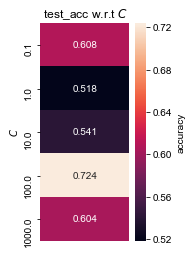

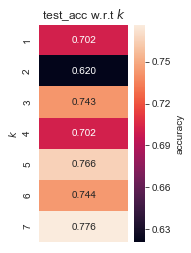

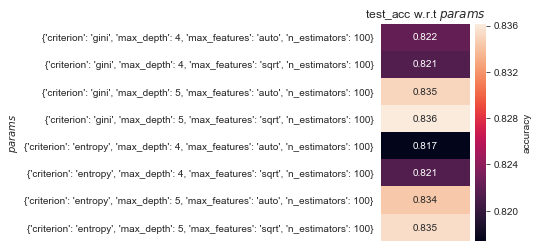

In [13]:
## Plot the heatmaps

print('The avg test scores for 20/80:')
print('SVM:', np.mean(avg_test_acc_svm))
print('KNN:', np.mean(avg_test_acc_knn))
print('RF:', np.mean(avg_test_acc_rf))
avg2080 = np.mean([np.mean(avg_test_acc_svm), np.mean(avg_test_acc_knn),
                   np.mean(avg_test_acc_rf)])

draw_heatmap_linear(avg_test_acc_svm.reshape(5,1), 'test_acc', C_list)
draw_heatmap_knn(avg_test_acc_knn.reshape(7,1), 'test_acc', K_list)
draw_heatmap_rf(avg_test_acc_rf.reshape(8,1), 'test_acc', params)

In [14]:
## Find the best hyperparameters

# SVM - best C
C_prime = SVM.best_params_['C']
print('Best C for SVM on Adult is:', C_prime)

# KNN - best K
K_prime = KNN.best_params_['n_neighbors']
print('Best K for KNN on Adult is:', K_prime)

# RF - best parameters
R_prime = RF.best_params_
print('Best RandomForest parameters for Adult are', R_prime)

Best C for SVM on Adult is: 100.0
Best K for KNN on Adult is: 7
Best RandomForest parameters for Adult are {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}


In [15]:
## Train the optimal classifiers using the best hyperparameters
## Display final test scores

# SVM
SVM_prime = LinearSVC(C=C_prime)
SVM_prime.fit(X_train, y_train)
test_score_svm = SVM_prime.score(X_test, y_test)
final_score_svm.append(test_score_svm)

# KNN
KNN_prime = KNeighborsClassifier(n_neighbors=K_prime)
KNN_prime.fit(X_train, y_train)
test_score_knn = KNN_prime.score(X_test, y_test)
final_score_knn.append(test_score_knn)

# RF
RF_prime = RandomForestClassifier(criterion=R_prime['criterion'], max_depth=R_prime['max_depth'], 
                                  max_features=R_prime['max_features'], n_estimators=R_prime['n_estimators'])
RF_prime.fit(X_train, y_train)
test_score_rf = RF_prime.score(X_test, y_test)
final_score_rf.append(test_score_rf)

print('For Adult.data, 20/80 split...')
print('Test score for SVM is:', test_score_svm)
print('Test score for KNN is:', test_score_knn)
print('Test score for RF is:', test_score_rf)

For Adult.data, 20/80 split...
Test score for SVM is: 0.7856731544397098
Test score for KNN is: 0.7785711543629315
Test score for RF is: 0.8378440631118277


### Adults 50/50

In [16]:
%%time

## Train every model on three random splits of 50/50

## Note: The split is non-deterministic. Repeating three times with the
## same split will give you somewhat different subsets. This is why three
## trials are needed to reach a consistent conclusion by taking the average.

print('Training three classifiers using three trials on Adult.data, split=50/50...')
print('(Accuracy scores are listed with respect to their individual hyperparameters.)')

# initialize the accuracy lists
avg_test_acc_svm = np.zeros((1,5))  # 5 for each value of C penalties
avg_test_acc_knn = np.zeros((1,7))  # 7 for each value of K neighbors
avg_test_acc_rf = np.zeros((1,8))   # 8 for each parameter combo in RF

for i in range(3):   # run three trials
    
    print('\nFor trial #', i+1)
    
    # split data into training/testing (50/50)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)
    
    # train SVM classifier
    C_list = [10e-7, 10e-6, 10e-5, 10e-4, 10e-3]
    param_grid = {'C': C_list}
    clf = LinearSVC()
    SVM = GridSearchCV(clf, param_grid, cv=5, return_train_score = True)
    SVM.fit(X_train, y_train)
    train_acc_svm = SVM.cv_results_['mean_train_score']
    test_acc_svm = SVM.cv_results_['mean_test_score']
    train_acc_svm = np.asarray(train_acc_svm)
    test_acc_svm = np.asarray(test_acc_svm)
    print('The SVM training accuracy is',train_acc_svm)
    print('The SVM testing accuracy is',test_acc_svm)
    avg_test_acc_svm = np.vstack((avg_test_acc_svm, test_acc_svm))
    
    # train KNN classifier
    K_list = list(range(1,8))
    param_grid = {'n_neighbors': K_list}
    clf = KNeighborsClassifier()
    KNN = GridSearchCV(clf, param_grid, cv=5, return_train_score = True)
    KNN.fit(X_train, y_train)
    train_acc_knn = KNN.cv_results_['mean_train_score']
    test_acc_knn = KNN.cv_results_['mean_test_score']
    train_acc_knn = np.asarray(train_acc_knn)
    test_acc_knn = np.asarray(test_acc_knn)
    print('\nThe KNN training accuracy is',train_acc_knn)
    print('The KNN testing accuracy is',test_acc_knn)
    avg_test_acc_knn = np.vstack((avg_test_acc_knn, test_acc_knn))
    
    # train RandomForest classifier
    param_grid = {'n_estimators': [100], 'max_features': ['auto', 'sqrt'],
                  'max_depth': [4,5], 'criterion':['gini', 'entropy']}
    clf = RandomForestClassifier()
    RF = GridSearchCV(clf, param_grid, cv=5, return_train_score = True)
    RF.fit(X_train, y_train)
    RFdf = pd.DataFrame.from_dict(data=RF.cv_results_)
    train_acc_rf = RF.cv_results_['mean_train_score']
    test_acc_rf = RF.cv_results_['mean_test_score']
    train_acc_rf = np.asarray(train_acc_rf)
    test_acc_rf = np.asarray(test_acc_rf)
    print('\nThe RF training accuracy is',train_acc_rf)
    print('The RF testing accuracy is',test_acc_rf)
    avg_test_acc_rf = np.vstack((avg_test_acc_rf, test_acc_rf))
    
# Begin displaying the testing accuracies.
print('\nReporting the average testing accuracies for all models...')

# Go through and delete first row of zeros (or else the avg suffers)
avg_test_acc_svm = np.delete(avg_test_acc_svm, 0, axis=0)
avg_test_acc_knn = np.delete(avg_test_acc_knn, 0, axis=0)
avg_test_acc_rf = np.delete(avg_test_acc_rf, 0, axis=0)

# SVM
avg_test_acc_svm = np.mean(avg_test_acc_svm, axis=0)
print('\nFor C =', C_list,'...')
print('The average test accuracy for SVM is', avg_test_acc_svm)

# KNN
avg_test_acc_knn = np.mean(avg_test_acc_knn, axis=0)
print('\nFor K =', K_list,'...')
print('The average test accuracy for KNN is', avg_test_acc_knn)

# RF
params = RFdf['params']
avg_test_acc_rf = np.mean(avg_test_acc_rf, axis=0)
print('\nFor the different parameters of Random Forest...')
print(params)
print('The average test accuracy is', avg_test_acc_rf)
print()

Training three classifiers using three trials on Adult.data, split=50/50...
(Accuracy scores are listed with respect to their individual hyperparameters.)

For trial # 1
The SVM training accuracy is [0.47628973 0.67966106 0.68328461 0.78599532 0.7901566 ]
The SVM testing accuracy is [0.47506143 0.68083538 0.68439803 0.78703931 0.78998771]

The KNN training accuracy is [1.         0.85744782 0.86010439 0.83203316 0.82940732 0.8197635
 0.8172297 ]
The KNN testing accuracy is [0.71977887 0.63826781 0.75694103 0.7218059  0.77641278 0.75651106
 0.78458231]

The RF training accuracy is [0.826259   0.82747235 0.84067873 0.83952701 0.81904172 0.82705803
 0.84011051 0.84106266]
The RF testing accuracy is [0.82463145 0.82610565 0.83906634 0.83771499 0.820086   0.8252457
 0.83636364 0.83894349]

For trial # 2
The SVM training accuracy is [0.69233737 0.59318223 0.67310342 0.78754627 0.64086816]
The SVM testing accuracy is [0.69164619 0.59514742 0.67223587 0.78777641 0.63992629]

The KNN training a

The avg test scores for 50/50:
SVM: 0.6793898443898444
KNN: 0.733941733941734
RF: 0.829222972972973


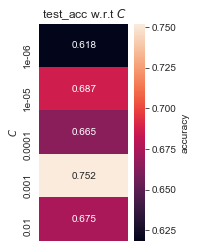

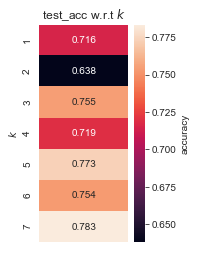

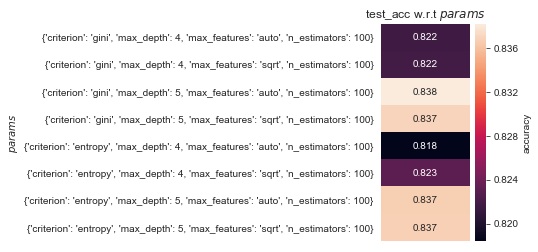

In [17]:
## Plot the heatmaps

print('The avg test scores for 50/50:')
print('SVM:', np.mean(avg_test_acc_svm))
print('KNN:', np.mean(avg_test_acc_knn))
print('RF:', np.mean(avg_test_acc_rf))
avg5050 = np.mean([np.mean(avg_test_acc_svm), np.mean(avg_test_acc_knn),
                   np.mean(avg_test_acc_rf)])

draw_heatmap_linear(avg_test_acc_svm.reshape(5,1), 'test_acc', C_list)
draw_heatmap_knn(avg_test_acc_knn.reshape(7,1), 'test_acc', K_list)
draw_heatmap_rf(avg_test_acc_rf.reshape(8,1), 'test_acc', params)

In [18]:
## Find the best hyperparameters

# SVM - best C
C_prime = SVM.best_params_['C']
print('Best C for SVM on Adult is:', C_prime)

# KNN - best K
K_prime = KNN.best_params_['n_neighbors']
print('Best K for KNN on Adult is:', K_prime)

# RF - best parameters
R_prime = RF.best_params_
print('Best RandomForest parameters for Adult are', R_prime)

Best C for SVM on Adult is: 1e-05
Best K for KNN on Adult is: 7
Best RandomForest parameters for Adult are {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 100}


In [19]:
## Train the optimal classifiers using the best hyperparameters
## Display final test scores

# SVM
SVM_prime = LinearSVC(C=C_prime)
SVM_prime.fit(X_train, y_train)
test_score_svm = SVM_prime.score(X_test, y_test)
final_score_svm.append(test_score_svm)

# KNN
KNN_prime = KNeighborsClassifier(n_neighbors=K_prime)
KNN_prime.fit(X_train, y_train)
test_score_knn = KNN_prime.score(X_test, y_test)
final_score_knn.append(test_score_knn)

# RF
RF_prime = RandomForestClassifier(criterion=R_prime['criterion'], max_depth=R_prime['max_depth'], 
                                  max_features=R_prime['max_features'], n_estimators=R_prime['n_estimators'])
RF_prime.fit(X_train, y_train)
test_score_rf = RF_prime.score(X_test, y_test)
final_score_rf.append(test_score_rf)

print('For Adult.data, 50/50 split...')
print('Test score for SVM is:', test_score_svm)
print('Test score for KNN is:', test_score_knn)
print('Test score for RF is:', test_score_rf)

For Adult.data, 50/50 split...
Test score for SVM is: 0.7777163564891592
Test score for KNN is: 0.7820158466924636
Test score for RF is: 0.8374792703150912


### Adults 80/20

In [20]:
%%time

## Train every model on three random splits of 80/20

## Note: The split is non-deterministic. Repeating three times with the
## same split will give you somewhat different subsets. This is why three
## trials are needed to reach a consistent conclusion by taking the average.

print('Training three classifiers using three trials on Adult.data, split=80/20...')
print('(Accuracy scores are listed with respect to their individual hyperparameters.)')

# initialize the accuracy lists
avg_test_acc_svm = np.zeros((1,5))  # 5 for each value of C penalties
avg_test_acc_knn = np.zeros((1,7))  # 7 for each value of K neighbors
avg_test_acc_rf = np.zeros((1,8))   # 8 for each parameter combo in RF

for i in range(3):   # run three trials
    
    print('\nFor trial #', i+1)
    
    # split data into training/testing (80/20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    
    # train SVM classifier
    C_list = [10e-1, 10e0, 10e1, 10e2, 10e3]
    param_grid = {'C': C_list}
    clf = LinearSVC()
    SVM = GridSearchCV(clf, param_grid, cv=5, return_train_score = True)
    SVM.fit(X_train, y_train)
    train_acc_svm = SVM.cv_results_['mean_train_score']
    test_acc_svm = SVM.cv_results_['mean_test_score']
    train_acc_svm = np.asarray(train_acc_svm)
    test_acc_svm = np.asarray(test_acc_svm)
    print('The SVM training accuracy is',train_acc_svm)
    print('The SVM testing accuracy is',test_acc_svm)
    avg_test_acc_svm = np.vstack((avg_test_acc_svm, test_acc_svm))
    
    # train KNN classifier
    K_list = list(range(1,8)) 
    param_grid = {'n_neighbors': K_list}
    clf = KNeighborsClassifier()
    KNN = GridSearchCV(clf, param_grid, cv=5, return_train_score = True)
    KNN.fit(X_train, y_train)
    train_acc_knn = KNN.cv_results_['mean_train_score']
    test_acc_knn = KNN.cv_results_['mean_test_score']
    train_acc_knn = np.asarray(train_acc_knn)
    test_acc_knn = np.asarray(test_acc_knn)
    print('\nThe KNN training accuracy is',train_acc_knn)
    print('The KNN testing accuracy is',test_acc_knn)
    avg_test_acc_knn = np.vstack((avg_test_acc_knn, test_acc_knn))
    
    # train RandomForest classifier
    param_grid = {'n_estimators': [100], 'max_features': ['auto', 'sqrt'],
                  'max_depth': [4,5], 'criterion':['gini', 'entropy']}
    clf = RandomForestClassifier()
    RF = GridSearchCV(clf, param_grid, cv=5, return_train_score = True)
    RF.fit(X_train, y_train)
    RFdf = pd.DataFrame.from_dict(data=RF.cv_results_)
    train_acc_rf = RF.cv_results_['mean_train_score']
    test_acc_rf = RF.cv_results_['mean_test_score']
    train_acc_rf = np.asarray(train_acc_rf)
    test_acc_rf = np.asarray(test_acc_rf)
    print('\nThe RF training accuracy is',train_acc_rf)
    print('The RF testing accuracy is',test_acc_rf)
    avg_test_acc_rf = np.vstack((avg_test_acc_rf, test_acc_rf))
    
# Begin displaying the testing accuracies.
print('\nReporting the average testing accuracies for all models...')

# Go through and delete first row of zeros (or else the avg suffers)
avg_test_acc_svm = np.delete(avg_test_acc_svm, 0, axis=0)
avg_test_acc_knn = np.delete(avg_test_acc_knn, 0, axis=0)
avg_test_acc_rf = np.delete(avg_test_acc_rf, 0, axis=0)

# SVM
avg_test_acc_svm = np.mean(avg_test_acc_svm, axis=0)
print('\nFor C =', C_list,'...')
print('The average test accuracy for SVM is', avg_test_acc_svm)

# KNN
avg_test_acc_knn = np.mean(avg_test_acc_knn, axis=0)
print('\nFor K =', K_list,'...')
print('The average test accuracy for KNN is', avg_test_acc_knn)

# RF
params = RFdf['params']
avg_test_acc_rf = np.mean(avg_test_acc_rf, axis=0)
print('\nFor the different parameters of Random Forest...')
print(params)
print('The average test accuracy is', avg_test_acc_rf)
print()

Training three classifiers using three trials on Adult.data, split=80/20...
(Accuracy scores are listed with respect to their individual hyperparameters.)

For trial # 1
The SVM training accuracy is [0.5854633  0.67637417 0.6770942  0.58356303 0.58685009]
The SVM testing accuracy is [0.58564957 0.67617475 0.676789   0.58334613 0.58653256]

The KNN training accuracy is [0.99997121 0.85917344 0.86372273 0.83386443 0.83234798 0.82289425
 0.82092674]
The KNN testing accuracy is [0.73034398 0.65206542 0.75967445 0.72519963 0.77579853 0.75587377
 0.78439803]

The RF training accuracy is [0.82299028 0.82537042 0.84012206 0.84100507 0.81934312 0.82474659
 0.83945984 0.84085152]
The RF testing accuracy is [0.82313421 0.82466984 0.83791462 0.84029484 0.81910319 0.82332617
 0.83833692 0.84021806]

For trial # 2
The SVM training accuracy is [0.7901184  0.68993104 0.69317019 0.62238066 0.7803094 ]
The SVM testing accuracy is [0.79061732 0.68976505 0.69057125 0.62304208 0.78009828]

The KNN training

The avg test scores for 80/20:
SVM: 0.6811757780507781
KNN: 0.7396070989820991
RF: 0.8306971744471745


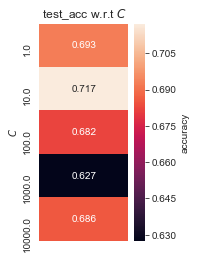

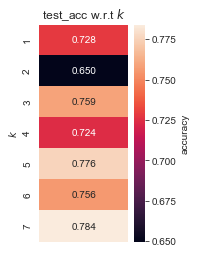

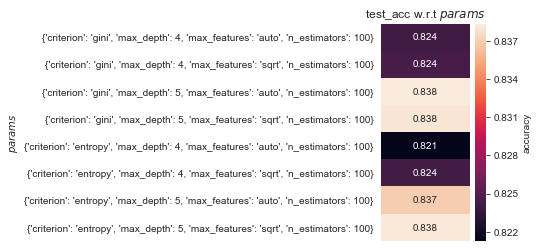

In [21]:
## Plot the heatmaps

print('The avg test scores for 80/20:')
print('SVM:', np.mean(avg_test_acc_svm))
print('KNN:', np.mean(avg_test_acc_knn))
print('RF:', np.mean(avg_test_acc_rf))
avg8020 = np.mean([np.mean(avg_test_acc_svm), np.mean(avg_test_acc_knn),
                   np.mean(avg_test_acc_rf)])

draw_heatmap_linear(avg_test_acc_svm.reshape(5,1), 'test_acc', C_list)
draw_heatmap_knn(avg_test_acc_knn.reshape(7,1), 'test_acc', K_list)
draw_heatmap_rf(avg_test_acc_rf.reshape(8,1), 'test_acc', params)

In [22]:
## Find the best hyperparameters

# SVM - best C
C_prime = SVM.best_params_['C']
print('Best C for SVM on Adult is:', C_prime)

# KNN - best K
K_prime = KNN.best_params_['n_neighbors']
print('Best K for KNN on Adult is:', K_prime)

# RF - best parameters
R_prime = RF.best_params_
print('Best RandomForest parameters for Adult are', R_prime)

Best C for SVM on Adult is: 10.0
Best K for KNN on Adult is: 7
Best RandomForest parameters for Adult are {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 100}


In [23]:
## Train the optimal classifiers using the best hyperparameters
## Display final test scores

# SVM
SVM_prime = LinearSVC(C=C_prime)
SVM_prime.fit(X_train, y_train)
test_score_svm = SVM_prime.score(X_test, y_test)
final_score_svm.append(test_score_svm)

# KNN
KNN_prime = KNeighborsClassifier(n_neighbors=K_prime)
KNN_prime.fit(X_train, y_train)
test_score_knn = KNN_prime.score(X_test, y_test)
final_score_knn.append(test_score_knn)

# RF
RF_prime = RandomForestClassifier(criterion=R_prime['criterion'], max_depth=R_prime['max_depth'], 
                                  max_features=R_prime['max_features'], n_estimators=R_prime['n_estimators'])
RF_prime.fit(X_train, y_train)
test_score_rf = RF_prime.score(X_test, y_test)
final_score_rf.append(test_score_rf)

print('For Adult.data, 80/20 split...')
print('Test score for SVM is:', test_score_svm)
print('Test score for KNN is:', test_score_knn)
print('Test score for RF is:', test_score_rf)

For Adult.data, 80/20 split...
Test score for SVM is: 0.7951788730231844
Test score for KNN is: 0.7789037309995394
Test score for RF is: 0.8326424074927069


## Display the final results

0.716221274033774 0.7475181837681838 0.7504933504933505


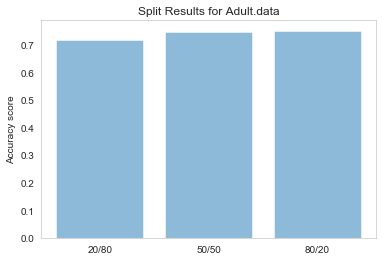

In [24]:
## Graph the individual split scores

print(avg2080, avg5050, avg8020)

objects = ('20/80', '50/50', '80/20')
y_pos = np.arange(len(objects))
performance = [avg2080, avg5050, avg8020]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy score')
plt.title('Split Results for Adult.data')
plt.show()

In [25]:
## Calculate average test scores for all splits

print('For Adult.data, the final test scores are:')
print('SVM:', np.mean(final_score_svm))
print('KNN:', np.mean(final_score_knn))
print('RF:', np.mean(final_score_rf))

For Adult.data, the final test scores are:
SVM: 0.7861894613173511
KNN: 0.7798302440183115
RF: 0.8359885803065419


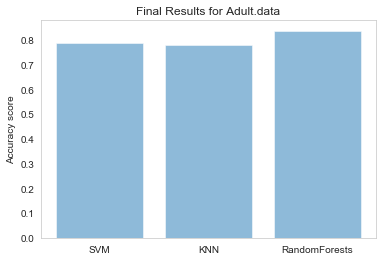

In [26]:
## Graph the final test scores

objects = ('SVM', 'KNN', 'RandomForests')
y_pos = np.arange(len(objects))
performance = [np.mean(final_score_svm), np.mean(final_score_knn), np.mean(final_score_rf)]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy score')
plt.title('Final Results for Adult.data')
plt.show()

# End